In [1]:
import sys
ros_path = '/opt/ros/kinetic/lib/python2.7/dist-packages'
if ros_path in sys.path:
    sys.path.remove(ros_path)
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages')

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as pil
import os

In [2]:
path = './training_data/test_images/'
n = os.listdir(path)
print('Number of samples:{}'.format(n))

Number of samples:['episode_0.npy', 'episode_9.npy', 'episode_5.npy', 'episode_15.npy', 'episode_16.npy', 'episode_8.npy', 'episode_7.npy', 'episode_6.npy', 'episode_2.npy', 'episode_12.npy', 'episode_1.npy', 'episode_10.npy', 'episode_17.npy', 'episode_14.npy', 'episode_3.npy', 'episode_11.npy', 'episode_4.npy', 'episode_13.npy']


In [3]:
def cal_time_to_col(image_buffer):
    num_images = len(image_buffer)
    time_to_coll = num_images / 22.
    
    # make label
    temp_t2c = []
    for i in range(num_images):
        temp_t2c.append(time_to_coll - i/22.)
    
    # select images and label
    k = 0
    new_image_buffer = []
    t2c = []
    for i in range(int(num_images / 5)):
        new_image_buffer.append(image_buffer[k])
        t2c.append(temp_t2c[k])
        k = k + 4
    
    return new_image_buffer, t2c

def batch_maker(image_buffer, t2c):
    n = len(image_buffer)
    if n > 6:
        train_x = np.zeros([n - 6, 6, 128, 128, 3])
        train_y = np.zeros([n - 6])

        for i in range(n - 6):
            train_x[i] = image_buffer[i:i+6]
            train_y[i] = t2c[i+6]
    else:
        train_x = 0
        train_y = 0
        
    return train_x, train_y

In [4]:
train_x = []
train_y = []
count = 0
for samples in n:
    temp = np.load(path + samples)
    [image_buffer,t2c] = cal_time_to_col(temp)
    [_train_x, _train_y] = batch_maker(image_buffer, t2c)
    if _train_x is not 0:
        count = count + len(_train_x)
        train_x.append(_train_x)
        train_y.append(_train_y)
print(count)

631


In [5]:
train_img = np.zeros([count, 6, 128, 128, 3])
train_label = np.zeros([count])

k = 0 
for index, samples in enumerate(train_x):
    n = len(samples)
    train_img[k:k + n] = samples
    train_label[k:k+n] = train_y[index]
    k = k + n

In [6]:
train_label[train_label >=6] = 6

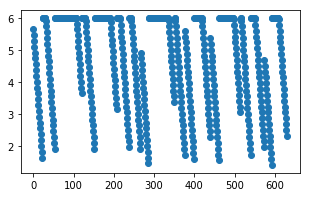

In [7]:
aa = np.arange(len(train_label))
plt.figure(figsize = (5,3))
plt.scatter(aa, train_label)
plt.show()

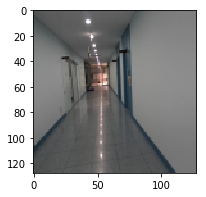

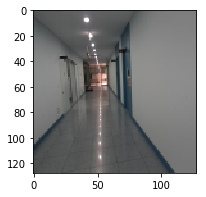

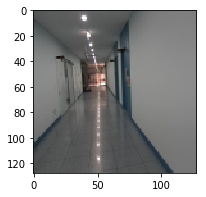

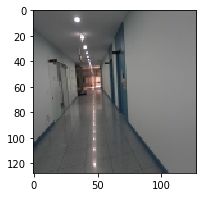

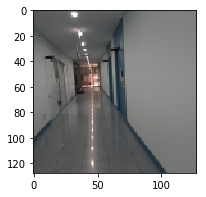

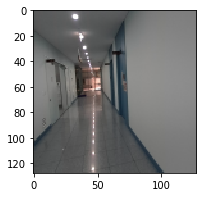

4.136363636363637


In [29]:
index = np.random.randint(len(train_img))
sample = train_img[index]
sample_y = train_label[index]

for i in range(6):
    plt.figure(figsize=(5,3))
    _sample = sample[i]
    _sample = np.reshape(_sample, (128,128,3)) / 255.
    plt.imshow(_sample)
    plt.show()
print(sample_y)

In [10]:
print(np.shape(train_img))

(631, 6, 128, 128, 3)


In [ ]:
# save the data
np.save('./training_data/test_images/test_img.npy', train_img)
np.save('./training_data/test_images/test_label.npy', train_label)

In [ ]:
list_dir = os.listdir('./training_data/gazebo2real/scene_1/')
n = len(list_dir)

In [ ]:
for i in range(n):
    a = cv2.imread('./training_data/gazebo2real/scene_1/' + str(i) + '_A.jpg')
    a = cv2.resize(a, (160, 128), interpolation = cv2.INTER_AREA)
    cv2.imwrite('./training_data/gazebo2real/resized_scene_1/' + str(i) + '_A.jpg', a)

In [ ]:
a = np.load('./training_data/test_images/episode_86.npy')

In [ ]:
print(np.shape(a))

In [ ]:
# # cv2.imwrite('data/dst/lena_opencv_red.jpg', im)
# count = 245
# for i in range(1522):
#     a = cv2.imread('./training_data/gazebo2real/new_trainA/' + str(i) + '_A.jpg')
# #     if np.mod(i,10) == 0:
#     cv2.imwrite('./training_data/gazebo2real/trainA/' + str(i) + '_A.jpg', a)

In [8]:
cv2.imwrite('data/dst/lena_opencv_red.jpg', im)

for i in range(len(a)):
    plt.figure()
    plt.imshow(a[i])
    plt.show()

NameError: name 'im' is not defined

In [ ]:
# frame per second = 25
time_to_collision = len(a) / 25.
print(time_to_collision)

----------------------------------------------------------------

In [ ]:
# store_dir = '/home/mw/zed/training_data/RGB_images/'
# start_index = 542

# load_dir = '/home/mw/zed/training_data/scene_4/'
# for i in range(87):
#     a = np.load(load_dir + 'episode_' + str(i) + '.npy')
#     np.save(store_dir + 'episode_' + str(start_index + i) + '.npy', a)